<a href="https://colab.research.google.com/github/sreej1305/aadhaar_enrolment_analysis/blob/main/aadhaar_enrolment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

zip_path = "/content/api_data_aadhar_enrolment.zip"
extract_dir = "/content/aadhaar_enrolment"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: /content/aadhaar_enrolment


In [2]:
import os

os.listdir("/content/aadhaar_enrolment")


['api_data_aadhar_enrolment']

In [3]:
os.listdir("/content/aadhaar_enrolment/api_data_aadhar_enrolment")


['api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

In [4]:
import pandas as pd
import glob

files = glob.glob("/content/aadhaar_enrolment/api_data_aadhar_enrolment/*.csv")

dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)

print("Merged dataset shape:", df.shape)
df.head()


Merged dataset shape: (1006029, 7)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,31-12-2025,Karnataka,Bidar,585330,2,3,0
1,31-12-2025,Karnataka,Bidar,585402,6,0,0
2,31-12-2025,Karnataka,Bidar,585413,1,0,0
3,31-12-2025,Karnataka,Bidar,585418,1,2,0
4,31-12-2025,Karnataka,Bidar,585421,4,3,0


In [5]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')

# Remove duplicates
df = df.drop_duplicates()

# Create Year & Month columns
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

# Create Total Enrolments column
df['Total_Enrolments'] = (
    df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 983072 entries, 0 to 1004911
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              983072 non-null  datetime64[ns]
 1   state             983072 non-null  object        
 2   district          983072 non-null  object        
 3   pincode           983072 non-null  int64         
 4   age_0_5           983072 non-null  int64         
 5   age_5_17          983072 non-null  int64         
 6   age_18_greater    983072 non-null  int64         
 7   Year              983072 non-null  int32         
 8   Month             983072 non-null  int32         
 9   Total_Enrolments  983072 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(5), object(2)
memory usage: 75.0+ MB


In [6]:
monthly_trend = df.groupby(['Year','Month'])['Total_Enrolments'].sum().reset_index()
monthly_trend.head()


,Year,Month,Total_Enrolments
0,2025,3,16582
1,2025,4,257438
2,2025,5,183616
3,2025,6,215734
4,2025,7,616868


In [7]:
state_totals = df.groupby('state')['Total_Enrolments'].sum().reset_index()
state_totals = state_totals.sort_values(by='Total_Enrolments', ascending=False)

state_totals.head(10)


,state,Total_Enrolments
45,Uttar Pradesh,1002631
6,Bihar,593753
27,Madhya Pradesh,487892
51,West Bengal,369206
28,Maharashtra,363446
39,Rajasthan,340591
16,Gujarat,275042
5,Assam,225359
23,Karnataka,219618
41,Tamil Nadu,215710


In [8]:
age_summary = df[['age_0_5','age_5_17','age_18_greater']].sum().reset_index()
age_summary.columns = ['Age_Group','Total_Enrolments']

age_summary


,Age_Group,Total_Enrolments
0,age_0_5,3474389
1,age_5_17,1690909
2,age_18_greater,166462


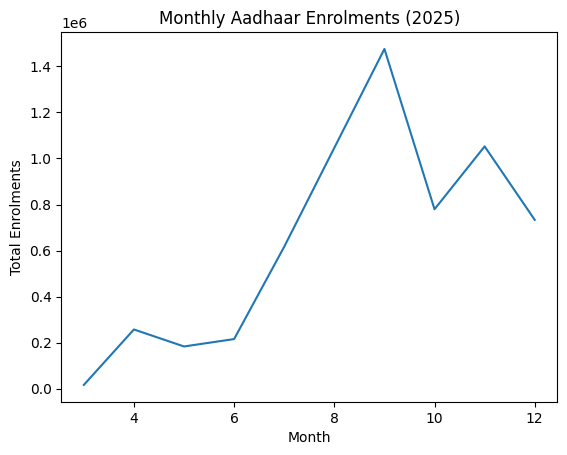

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_trend['Month'], monthly_trend['Total_Enrolments'])
plt.title("Monthly Aadhaar Enrolments (2025)")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.show()


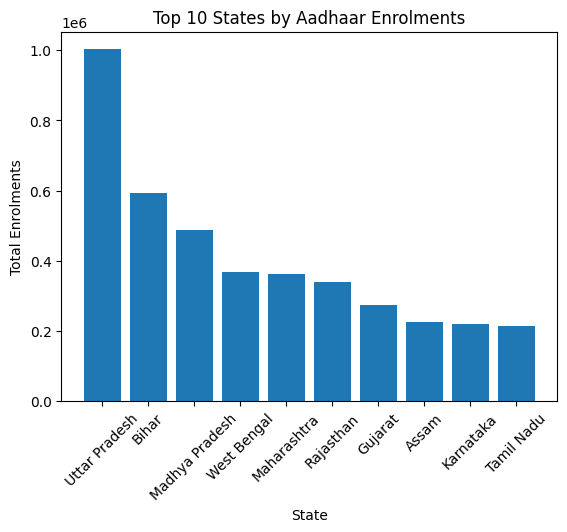

In [10]:
top10_states = state_totals.head(10)

plt.figure()
plt.bar(top10_states['state'], top10_states['Total_Enrolments'])
plt.title("Top 10 States by Aadhaar Enrolments")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


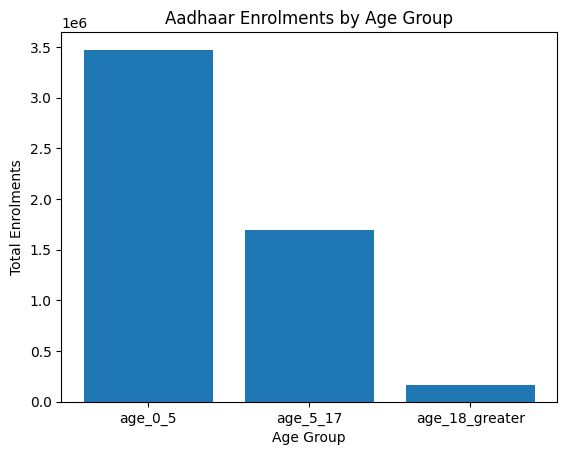

In [11]:
plt.figure()
plt.bar(age_summary['Age_Group'], age_summary['Total_Enrolments'])
plt.title("Aadhaar Enrolments by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments")
plt.show()


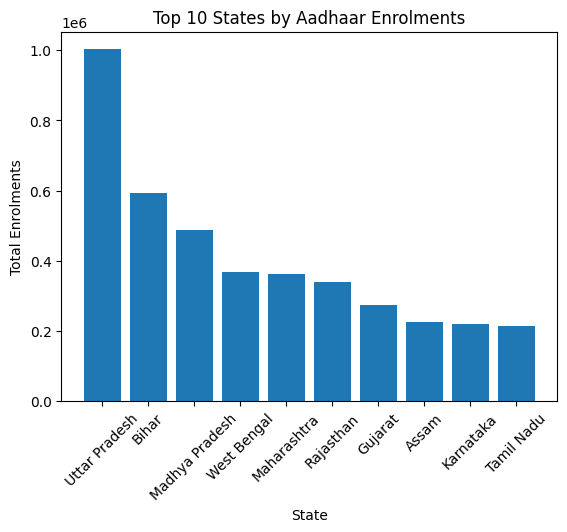

In [12]:
top10_states = state_totals.head(10)

plt.figure()
plt.bar(top10_states['state'], top10_states['Total_Enrolments'])
plt.title("Top 10 States by Aadhaar Enrolments")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


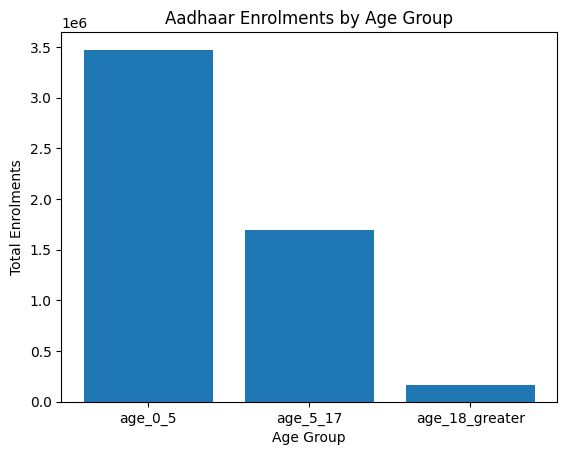

In [13]:
plt.figure()
plt.bar(age_summary['Age_Group'], age_summary['Total_Enrolments'])
plt.title("Aadhaar Enrolments by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments")
plt.show()


In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare time index
monthly_trend['t'] = np.arange(len(monthly_trend))

X = monthly_trend[['t']]
y = monthly_trend['Total_Enrolments']

# Train model
model = LinearRegression()
model.fit(X, y)

# Forecast next 6 months
future_t = np.arange(len(monthly_trend), len(monthly_trend) + 6).reshape(-1, 1)
forecast = model.predict(future_t)

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Month_Index': future_t.flatten(),
    'Forecast_Enrolments': forecast
})

forecast_df


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Month_Index,Forecast_Enrolments
0,9,1.234503e+06
1,10,1.362920e+06
2,11,1.491337e+06
3,12,1.619754e+06
4,13,1.748172e+06
5,14,1.876589e+06


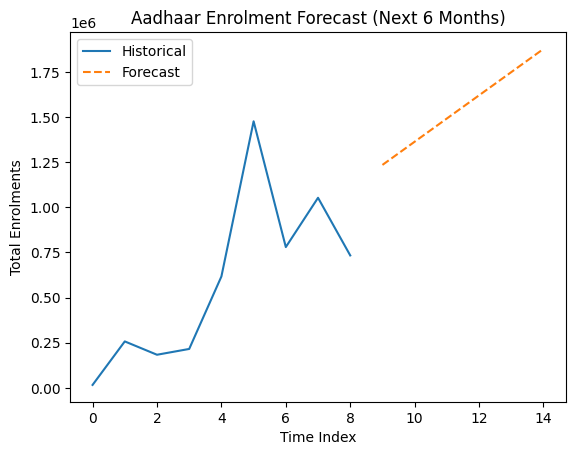

In [15]:
plt.figure()

plt.plot(monthly_trend['t'], monthly_trend['Total_Enrolments'], label='Historical')
plt.plot(future_t, forecast, linestyle='--', label='Forecast')

plt.title("Aadhaar Enrolment Forecast (Next 6 Months)")
plt.xlabel("Time Index")
plt.ylabel("Total Enrolments")
plt.legend()
plt.show()


In [16]:
mean_val = monthly_trend['Total_Enrolments'].mean()
std_val = monthly_trend['Total_Enrolments'].std()

monthly_trend['z_score'] = (
    (monthly_trend['Total_Enrolments'] - mean_val) / std_val
)

# Mark anomalies
monthly_trend['Anomaly'] = monthly_trend['z_score'].abs() > 2

monthly_trend[['Year','Month','Total_Enrolments','z_score','Anomaly']]


,Year,Month,Total_Enrolments,z_score,Anomaly
0,2025,3,16582,-1.213768,False
1,2025,4,257438,-0.706083,False
2,2025,5,183616,-0.861688,False
3,2025,6,215734,-0.793988,False
4,2025,7,616868,0.051537,False
5,2025,9,1475879,1.862193,False
6,2025,10,779617,0.394586,False
7,2025,11,1052584,0.969956,False
8,2025,12,733442,0.297256,False


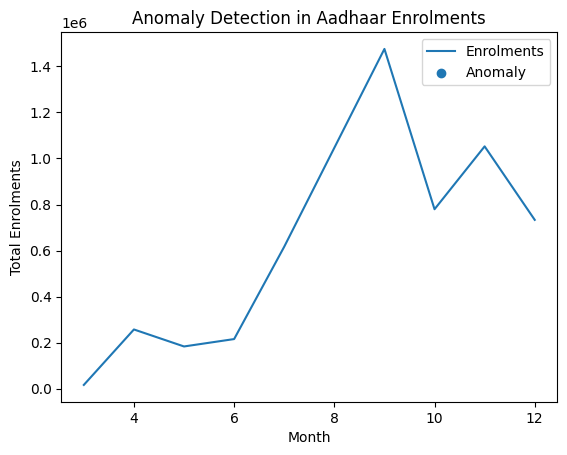

In [17]:
plt.figure()

plt.plot(monthly_trend['Month'], monthly_trend['Total_Enrolments'], label='Enrolments')

anomalies = monthly_trend[monthly_trend['Anomaly']]
plt.scatter(anomalies['Month'], anomalies['Total_Enrolments'], marker='o', label='Anomaly')

plt.title("Anomaly Detection in Aadhaar Enrolments")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.legend()
plt.show()
